# Neural Ordinary Differential Equation

Using a neural network to learn the derivative of a function from the inputs to the outputs, which is approximated by a numerical ordinary differential equation solver.  Chen et al (2018) showed how to backpropogate the gradient of the loss over the ODE solver by solving another ODE, using a method called the adjoint sensitivity method.  They've implemented ODE solvers in pytorch, and their basic methods allow regular backpropogation, but they've also implemented a method which uses the adjoint for backpropogation, which seems to be more numerically robust and only linear in the amount of memory used...  Might need to read more about it...  The regular method uses more memory but is faster for smaller problems.

Have to use pytorch nn Module for neural net.  Good to start learning it.

This is actually starting to seem retarded.  All you're doing is learning a function from the input to the difference between the input and the output, and then running a numerical solver over that, instead of just learning the mapping from the input directly to the output.  I really can't see how that would ever be beneficial.  So really this only makes sense when you're learning actual trajectories right?  Does it make sense then?  To learn the gradients of the trajectories, rather than the trajectories directly?  I guess if you expect the gradient to have a simpler form, and that sounds a lot more sensible.  Man, is Sally right that even these big conferences are just publishing rubbish because they're all rushing too much to even think about what they're doing???

In [1]:
# Import packages
import numpy as np
import torch
import plotly.graph_objects as go
from nn import *

In [2]:
# Make data
r = 1
x = torch.linspace(-r, r, 101).reshape(101, 1)

# Target functions, from easy to hard
# y = torch.maximum(2 * x, torch.zeros_like(x))
# y = x**3
# y = np.exp(x)
y = np.sin(np.pi * x)

# Set number of neurons in hidden layer
n_hidden = 10

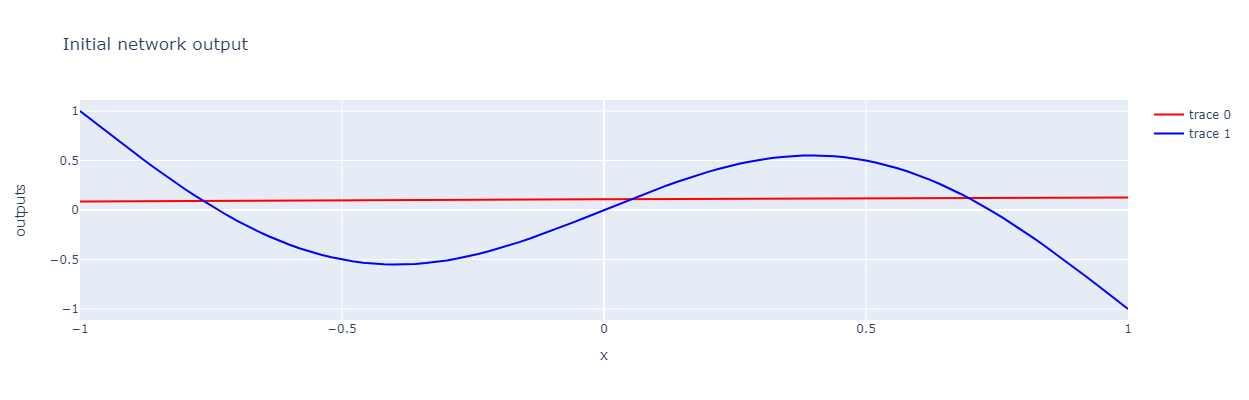

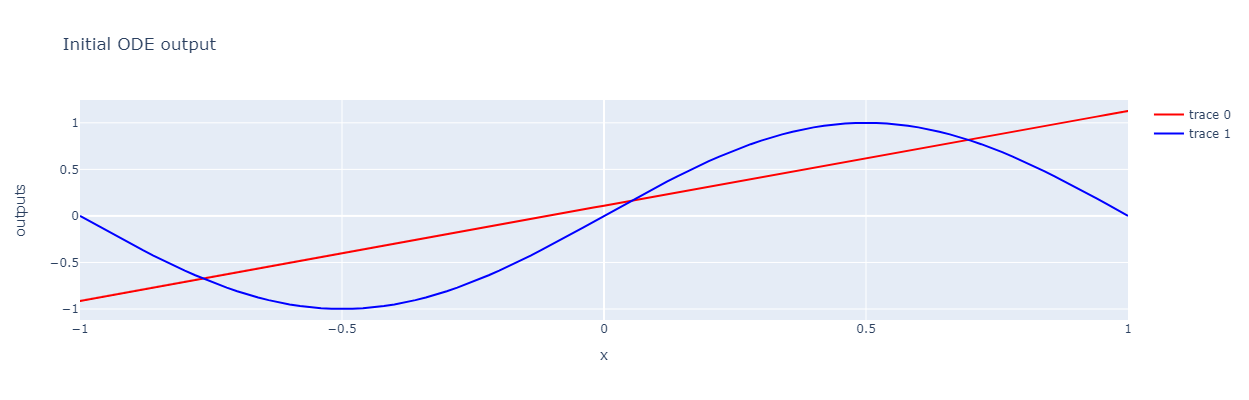

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9


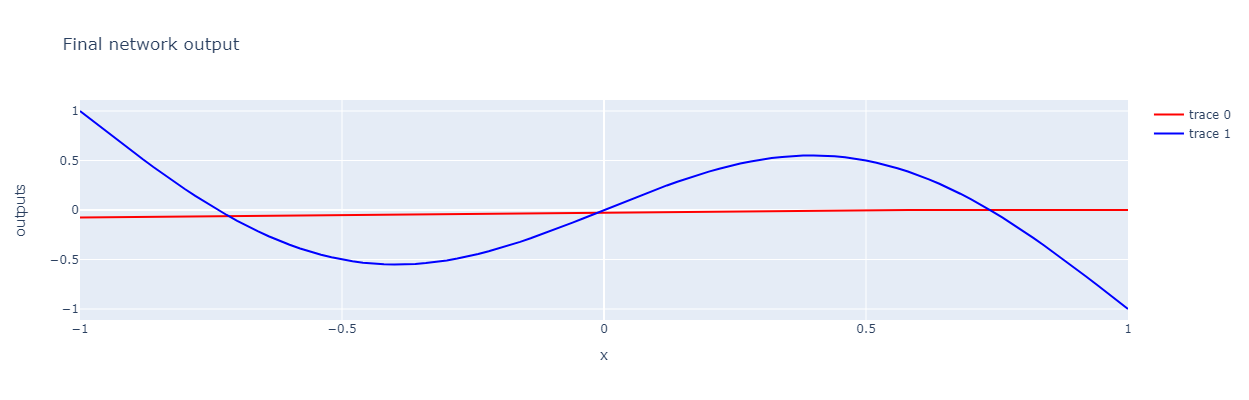

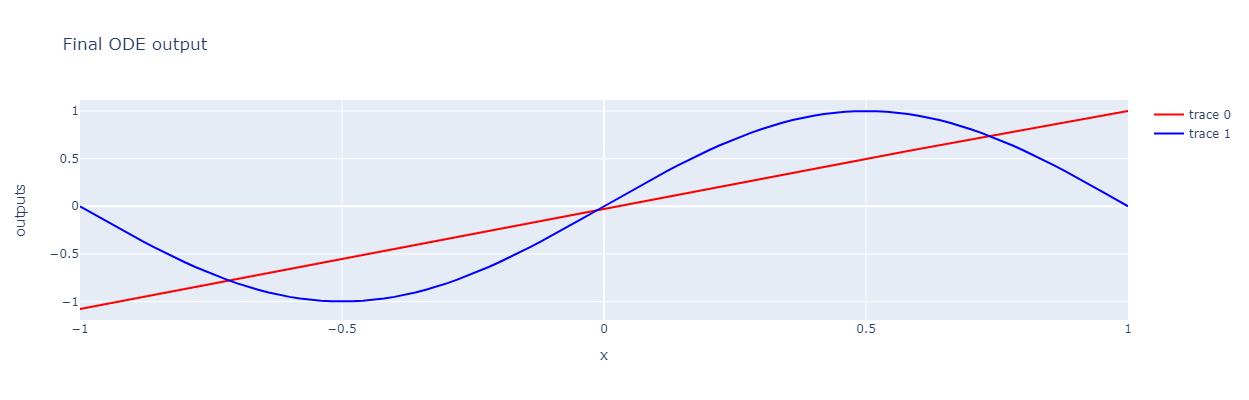

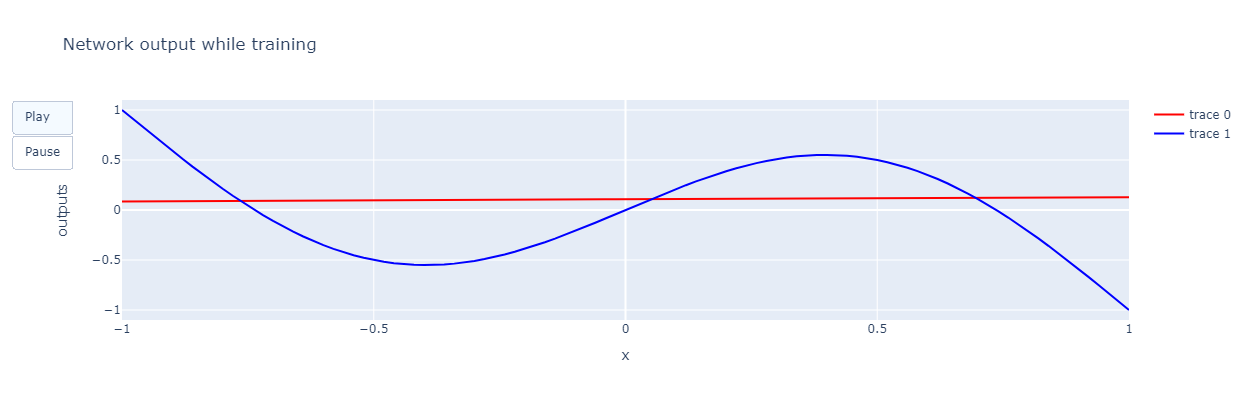

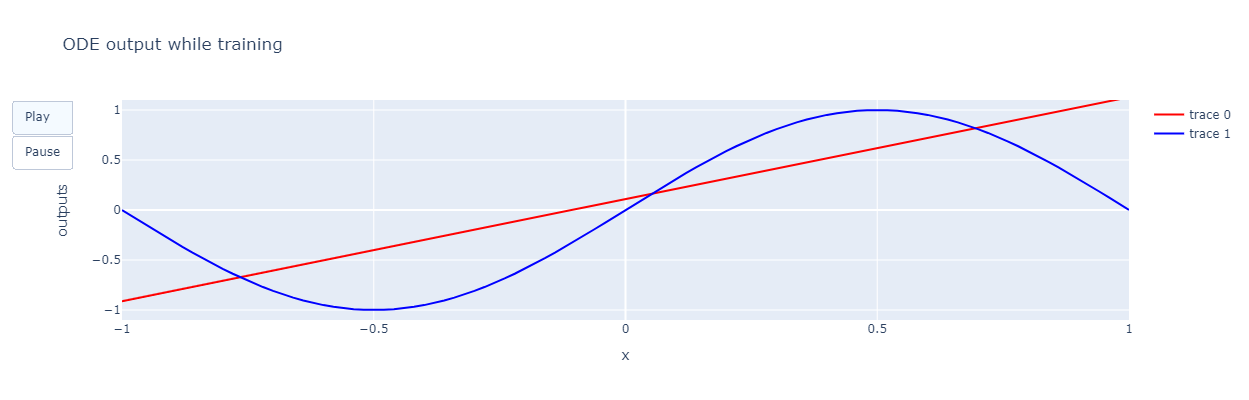

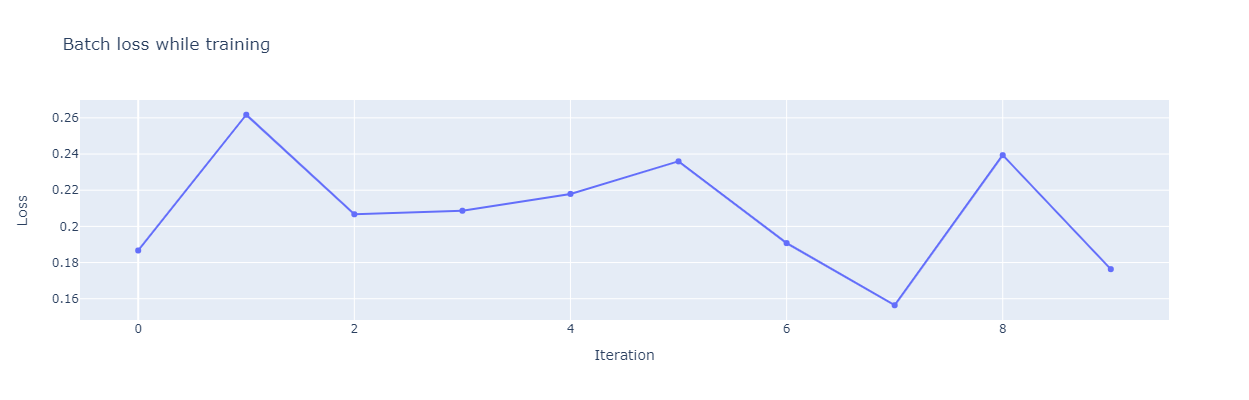

In [6]:
# Specify GPU if available, CPU otherwise
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Create neural network derivative function and pass to GPU
func = ODEFunc(n_hidden).to(device)

# Train Neural ODE
train_node(func, x, y, device, lr=1e-2, niters=10, batch_size=20, test_freq=1, adjoint=False)

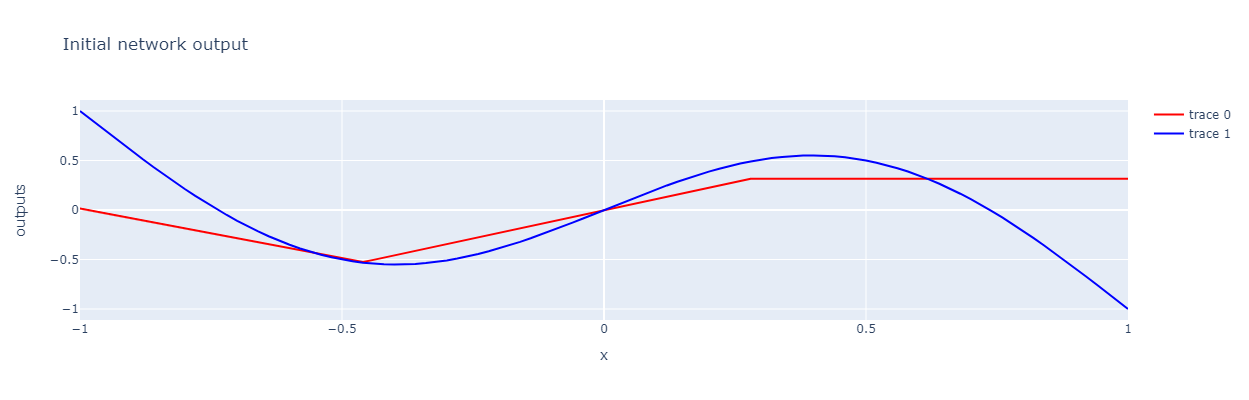

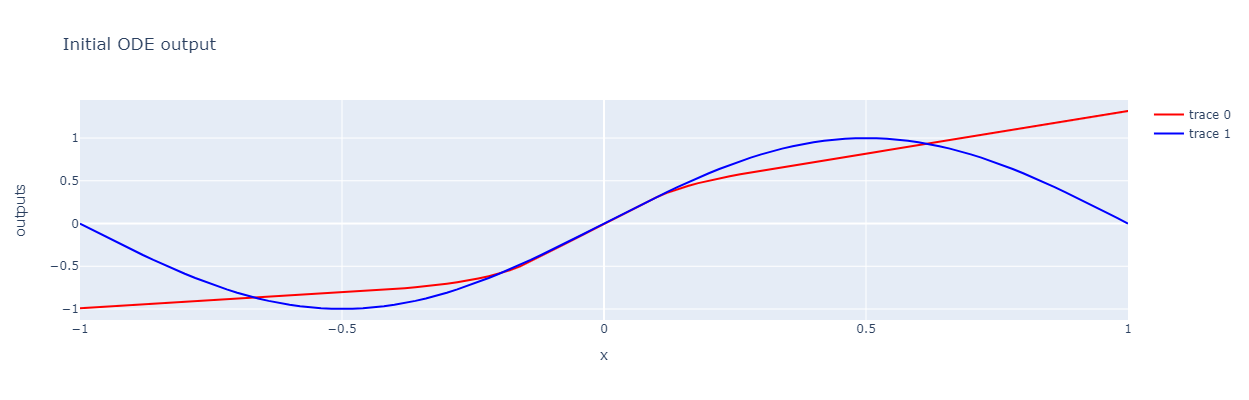

Iteration 0
Iteration 10
Iteration 20
Iteration 30
Iteration 40
Iteration 50
Iteration 60
Iteration 70
Iteration 80
Iteration 90


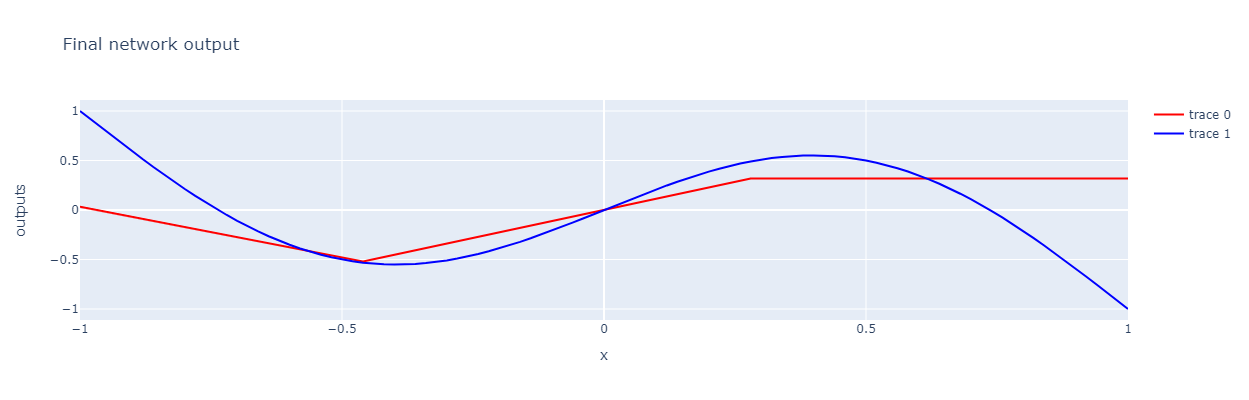

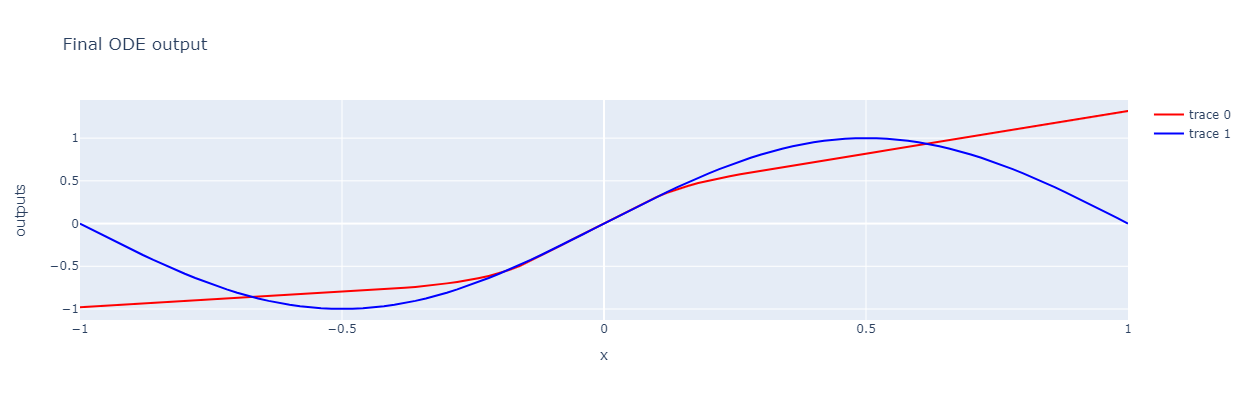

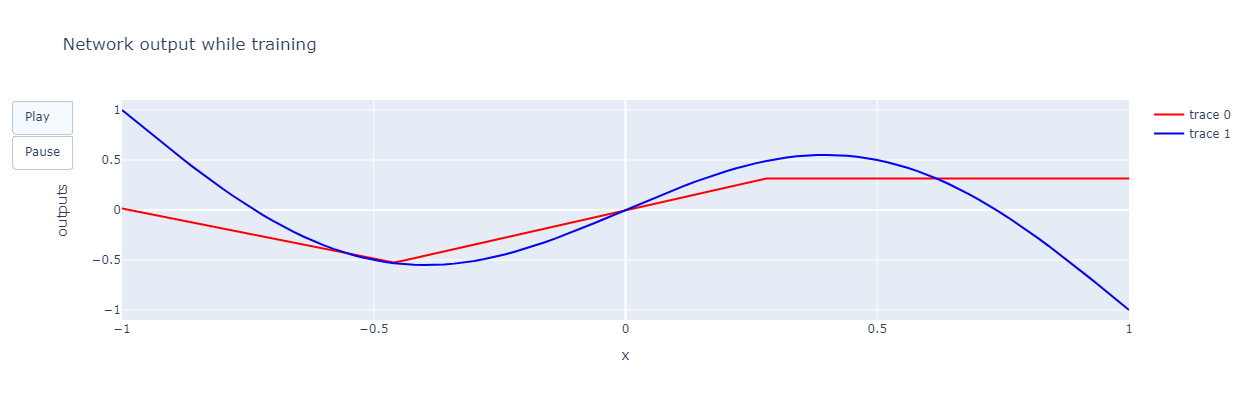

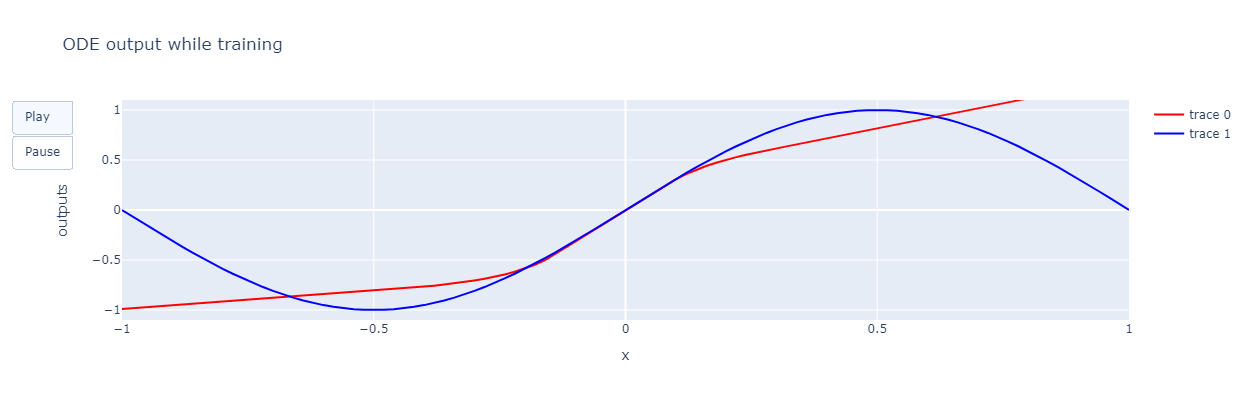

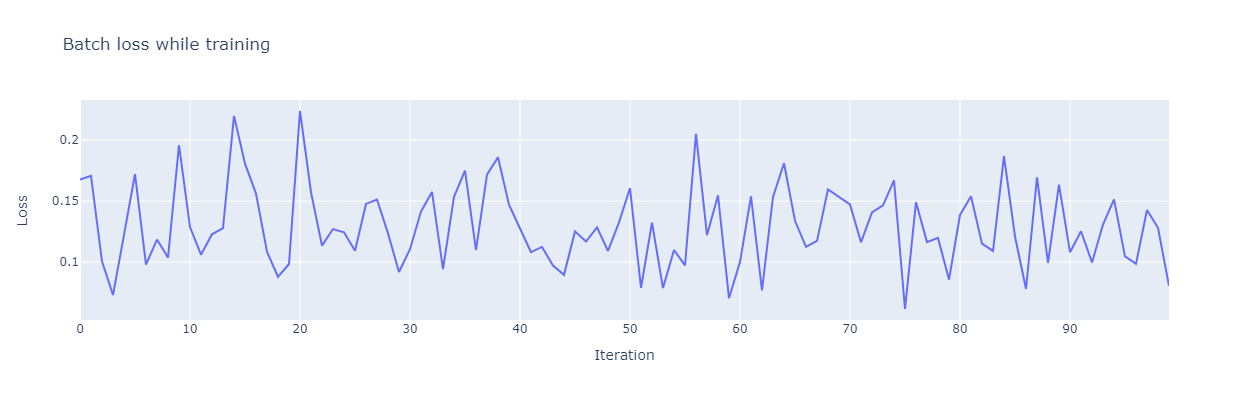

In [11]:
# Train Neural ODE
train_node(func, x, y, device, lr=1e-4, niters=100, batch_size=20, test_freq=10, adjoint=False)